In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import mxnet as mx
import numpy as np
import pandas as pd

import logging
logging.getLogger().setLevel(logging.DEBUG)

In [3]:
organs = pd.read_csv('data/TGGATES/cel/rat/organs.csv',index_col=0)

In [4]:
dosages = pd.read_csv('data/TGGATES/cel/rat/dosages.csv',index_col=0)

In [5]:
timepoints = pd.read_csv('data/TGGATES/cel/rat/timepoints.csv',index_col=0)

In [6]:
biochem = pd.read_csv('data/TGGATES/cel/rat/biochem.scaled.csv',index_col=0)

In [7]:
biochem = pd.read_csv('data/TGGATES/cel/rat/biochem.scaled.csv',index_col=0)

In [8]:
expr = pd.read_csv('data/TGGATES/cel/rat/exprs.scaled.csv',index_col=0)

In [9]:
biochem

,ALP.IU.L.,TC.mg.dL.,TG.mg.dL.,PL.mg.dL.,TBIL.mg.dL.,DBIL.mg.dL.,GLC.mg.dL.,BUN.mg.dL.,CRE.mg.dL.,Na.meq.L.,...,Cl.meq.L.,Ca.mg.dL.,IP.mg.dL.,TP.g.dL.,RALB.g.dL.,A.G,AST.IU.L.,ALT.IU.L.,LDH.IU.L.,GTP.IU.L.
003017804015.CEL,0.255975,0.760000,0.281746,0.770833,0.800000,0.173913,0.387387,0.769231,0.4,0.428571,...,0.222222,0.538462,0.694444,0.533333,0.65,0.529412,0.686275,0.491228,0.267081,0.50
003017644018.CEL,0.255975,0.760000,0.281746,0.770833,0.800000,0.173913,0.387387,0.769231,0.4,0.428571,...,0.222222,0.538462,0.694444,0.533333,0.65,0.529412,0.686275,0.491228,0.267081,0.50
003017804016.CEL,0.176730,0.520000,0.115079,0.541667,0.466667,0.347826,0.252252,0.384615,0.2,0.428571,...,0.444444,0.461538,0.611111,0.333333,0.60,0.588235,0.313725,0.192982,0.447205,0.25
003017644019.CEL,0.176730,0.520000,0.115079,0.541667,0.466667,0.347826,0.252252,0.384615,0.2,0.428571,...,0.444444,0.461538,0.611111,0.333333,0.60,0.588235,0.313725,0.192982,0.447205,0.25
003017804017.CEL,0.284906,0.426667,0.059524,0.312500,0.700000,0.260870,0.351351,0.461538,0.6,0.285714,...,0.111111,0.538462,0.611111,0.466667,0.65,0.588235,0.313725,0.210526,0.086957,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
003017583012.CEL,0.426415,0.026667,0.373016,0.218750,0.466667,0.434783,0.297297,0.923077,0.6,0.428571,...,0.666667,0.461538,0.250000,0.266667,0.50,0.470588,0.352941,0.105263,0.388199,0.25
003017583013.CEL,0.333333,0.013333,0.690476,0.385417,0.500000,0.608696,0.468468,0.461538,0.6,0.571429,...,0.666667,0.269231,0.250000,0.333333,0.55,0.529412,0.607843,0.456140,0.434783,0.25
003017586007.CEL,0.342138,0.400000,0.190476,0.354167,0.266667,0.260870,0.423423,0.461538,0.6,0.428571,...,0.444444,0.423077,0.444444,0.533333,0.55,0.352941,0.588235,0.245614,0.531056,0.50
003017586008.CEL,0.403774,0.333333,0.130952,0.270833,0.266667,0.304348,0.459459,0.615385,0.6,0.571429,...,0.444444,0.423077,0.472222,0.533333,0.60,0.470588,0.686275,0.456140,0.369565,0.25


In [179]:
biochem_var = mx.sym.Variable('biochem')

In [180]:
time_var = mx.sym.Variable('time')

In [181]:
PCAin  = mx.sym.FullyConnected(data=biochem_var, name='PCAin', num_hidden = 3)
biochem_time = mx.sym.concat(PCAin,time_var)
PCAout  = mx.sym.FullyConnected(data=biochem_time, name='PCAout', num_hidden = biochem.shape[1])

In [182]:
biochem_approx = mx.symbol.Variable('biochem_approx')
linReg = mx.sym.LinearRegressionOutput(data=PCAout, label=biochem_approx, name="linReg")

DEBUG:graphviz.backend:run ['dot', '-Tsvg']


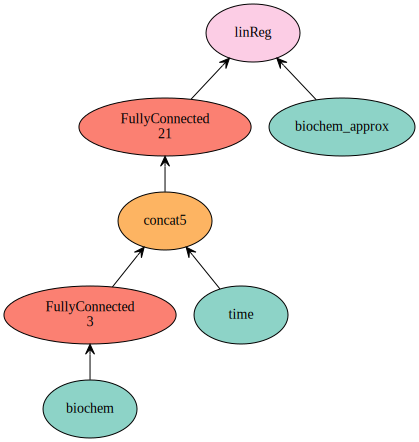

In [183]:
model = mx.mod.Module(
    symbol = linReg ,
    data_names=['biochem','time'],
    label_names = ['biochem_approx']
)
mx.viz.plot_network(symbol=linReg, node_attrs={"shape":"oval","fixedsize":"false"})

In [186]:
batch_size = 25
num_epoch = 100
rseed = 123

In [187]:
np.random.seed(rseed)
mx.random.seed(rseed)

model.bind(
    data_shapes=[('biochem', (batch_size,biochem.shape[1])) , ('time', (batch_size,1))], 
    label_shapes=[('biochem_approx', (batch_size,biochem.shape[1]))]
)

model.fit(
    mx.io.NDArrayIter(
        #biochem.values,
        [biochem.values,np.array([timepoints['SCALED.HOURS'].values]).T],
        biochem.values,
        batch_size=batch_size, 
        shuffle=True
    ),
    optimizer_params={
        'learning_rate':0.5, 
        'momentum': 0.9
    },
    num_epoch=num_epoch,
    eval_metric='mse'
)

/tmp/.conda/envs/mouse_learning/lib/python3.7/site-packages/mxnet/module/base_module.py:502: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)
INFO:root:Epoch[0] Train-mse=0.014610
INFO:root:Epoch[0] Time cost=0.005
INFO:root:Epoch[1] Train-mse=0.014490
INFO:root:Epoch[1] Time cost=0.004
INFO:root:Epoch[2] Train-mse=0.014521
INFO:root:Epoch[2] Time cost=0.004
INFO:root:Epoch[3] Train-mse=0.014490
INFO:root:Epoch[3] Time cost=0.004
INFO:root:Epoch[4] Train-mse=0.014403
INFO:root:Epoch[4] Time cost=0.004
INFO:root:Epoch[5] Train-mse=0.014687
INFO:root:Epoch[5] Time cost=0.004
INFO:root:Epoch[6] Train-mse=0.014510
INFO:root:Epoch[6] Time cost=0.004
INFO:root:Epoch[7] Train-mse=0.014702
INFO:root:Epoch[7] Time cost=0.004
INFO:root:Epoch[8] Train-mse=0.014706
INFO:root:Epoch[8] Time cost=0.004
INFO:root:Epoch[9] Train-mse=0.014910
INFO:root:Epoch[9] Time cost=0.004
INFO:root:Epoch[10] Train-mse=0

In [188]:
pcorr = model.score(
    mx.io.NDArrayIter(
        #biochem.values,
        [biochem.values,np.array([timepoints['SCALED.HOURS'].values]).T],
        biochem.values,
        batch_size=batch_size, 
        shuffle=False
    ), 
    mx.metric.PearsonCorrelation()
)
print("Achieved {0:.3f} training PearsonCorrelation".format(pcorr[0][1]))

Achieved 0.826 training PearsonCorrelation


In [189]:
pca_extract = PCAin.eval(
    ctx=mx.cpu(),
    biochem=mx.nd.array(biochem.values),
    time=mx.nd.array(np.array([timepoints['SCALED.HOURS'].values]).T),
    **model.get_params()[0]
)[0].asnumpy()

In [190]:
dat = dosages.merge(organs,left_index=True,right_index=True).merge(timepoints,left_index=True,right_index=True)

In [191]:
dat['PC1'] = pd.Series(pca_extract[:,0], index=biochem.index)
dat['PC2'] = pd.Series(pca_extract[:,1], index=biochem.index)

In [192]:
dat

,COMPOUND_NAME,COMPOUND_NO,DOSE,SCALED.DOSE,ORGAN,ORGAN_NO,SACRI_PERIOD,HOURS,SCALED.HOURS,PC1,PC2
003017804015.CEL,acetaminophen,1,0,0.0,Kidney,2,3 hr,3,0.125,-0.114069,0.929155
003017644018.CEL,acetaminophen,1,0,0.0,Liver,1,3 hr,3,0.125,-0.114069,0.929155
003017804016.CEL,acetaminophen,1,0,0.0,Kidney,2,3 hr,3,0.125,0.002576,0.336899
003017644019.CEL,acetaminophen,1,0,0.0,Liver,1,3 hr,3,0.125,0.002576,0.336899
003017804017.CEL,acetaminophen,1,0,0.0,Kidney,2,3 hr,3,0.125,-0.133216,0.433493
...,...,...,...,...,...,...,...,...,...,...,...
003017583012.CEL,acetamidofluorene,144,100,0.1,Liver,1,24 hr,24,1.000,-0.230357,0.099877
003017583013.CEL,acetamidofluorene,144,100,0.1,Liver,1,24 hr,24,1.000,-0.394026,0.109553
003017586007.CEL,acetamidofluorene,144,300,0.3,Liver,1,3 hr,3,0.125,-0.440353,0.230960
003017586008.CEL,acetamidofluorene,144,300,0.3,Liver,1,3 hr,3,0.125,-0.470545,0.266659


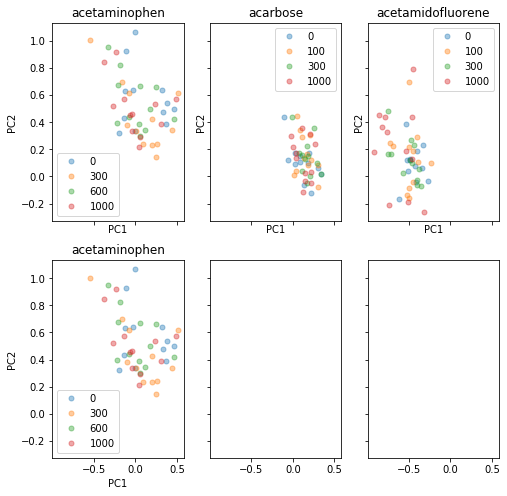

In [193]:
plti = -1
fig,axes = plt.subplots(2,3,True,True,figsize=(8,8))
for genotype, genotypeGroup in dat.groupby('ORGAN'):
    for trt, treatmentGroup in genotypeGroup.groupby('COMPOUND_NAME'):
        plti += 1
        ax = axes.flatten()[plti]
        for name, group in treatmentGroup.groupby('DOSE'):
            ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=5, label=name,alpha=.4)
        ax.legend()
        ax.set_title(trt)
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')

In [194]:
dat

,COMPOUND_NAME,COMPOUND_NO,DOSE,SCALED.DOSE,ORGAN,ORGAN_NO,SACRI_PERIOD,HOURS,SCALED.HOURS,PC1,PC2
003017804015.CEL,acetaminophen,1,0,0.0,Kidney,2,3 hr,3,0.125,-0.114069,0.929155
003017644018.CEL,acetaminophen,1,0,0.0,Liver,1,3 hr,3,0.125,-0.114069,0.929155
003017804016.CEL,acetaminophen,1,0,0.0,Kidney,2,3 hr,3,0.125,0.002576,0.336899
003017644019.CEL,acetaminophen,1,0,0.0,Liver,1,3 hr,3,0.125,0.002576,0.336899
003017804017.CEL,acetaminophen,1,0,0.0,Kidney,2,3 hr,3,0.125,-0.133216,0.433493
...,...,...,...,...,...,...,...,...,...,...,...
003017583012.CEL,acetamidofluorene,144,100,0.1,Liver,1,24 hr,24,1.000,-0.230357,0.099877
003017583013.CEL,acetamidofluorene,144,100,0.1,Liver,1,24 hr,24,1.000,-0.394026,0.109553
003017586007.CEL,acetamidofluorene,144,300,0.3,Liver,1,3 hr,3,0.125,-0.440353,0.230960
003017586008.CEL,acetamidofluorene,144,300,0.3,Liver,1,3 hr,3,0.125,-0.470545,0.266659


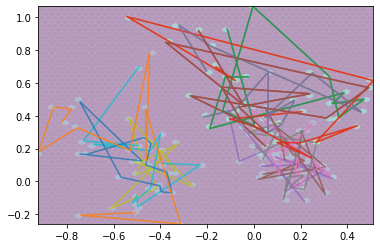

In [195]:
plt.hexbin(pca_extract[:,0],pca_extract[:,1],gridsize=50,linewidths=0,alpha=.4)

for genotype, genotypeGroup in dat.groupby('ORGAN'):
    for trt, treatmentGroup in genotypeGroup.groupby('COMPOUND_NAME'):
        #for tp, timeGroup in treatmentGroup.groupby('SACRI_PERIOD'):
        for dose, doseGroup in treatmentGroup.groupby('DOSE'):
            #print(genotype,trt)
            plt.plot(doseGroup['PC1'],doseGroup['PC2'],label='%s %s %s'%(genotype,trt,dose),alpha=.8)
#plt.legend()